### Load and explore an audio dataset

In this course we will use the 🤗 Datasets library to work with audio datasets. 🤗 Datasets is an open-source library for downloading and preparing datasets from all modalities including audio. The library offers easy access to an unparalleled selection of machine learning datasets publicly available on Hugging Face Hub. Moreover, 🤗 Datasets includes multiple features tailored to audio datasets that simplify working with such datasets for both researchers and practitioners.

To begin working with audio datasets, make sure you have the 🤗 Datasets library installed:

- pip install datasets[audio]

One of the key defining features of 🤗 Datasets is the ability to download and prepare a dataset in just one line of Python code using the load_dataset() function.

Let’s load and explore and audio dataset called MINDS-14, which contains recordings of people asking an e-banking system questions in several languages and dialects.

To load the MINDS-14 dataset, we need to copy the dataset’s identifier on the Hub (PolyAI/minds14) and pass it to the load_dataset function. We’ll also specify that we’re only interested in the Australian subset (en-AU) of the data, and limit it to the training split:

In [11]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train", trust_remote_code=True)

minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 604
})

In [12]:
example = minds[0]
example

{'path': '/home/rlimonta/.cache/huggingface/datasets/downloads/extracted/7c73797e399dc940facc5dedb2e9a9e893a1de9d628b685a0d58c032d38c9897/pt-PT~CASH_DEPOSIT/response_4.wav',
 'audio': {'path': '/home/rlimonta/.cache/huggingface/datasets/downloads/extracted/7c73797e399dc940facc5dedb2e9a9e893a1de9d628b685a0d58c032d38c9897/pt-PT~CASH_DEPOSIT/response_4.wav',
  'array': array([ 0.        ,  0.        ,  0.        , ...,  0.00048828,
         -0.00097656, -0.00048828]),
  'sampling_rate': 8000},
 'transcription': 'Bom dia estou a ligar porque precisava de informações sobre como é que eu posso depositar dinheiro na minha conta',
 'english_transcription': "Good morning I'm calling because I needed information on how I can deposit money into my account",
 'intent_class': 7,
 'lang_id': 11}

You may notice that the audio column contains several features. Here’s what they are:

- path: the path to the audio file (*.wav in this case).
- array: The decoded audio data, represented as a 1-dimensional NumPy array.
- sampling_rate. The sampling rate of the audio file (8,000 Hz in this example).

The intent_class is a classification category of the audio recording. To convert this number into a meaningful string, we can use the int2str() method:

### Features

If you look at the transcription feature, you can see that the audio file indeed has recorded a person asking a question about paying a bill.

In [13]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'cash_deposit'

### Remove Columns

You can easily remove irrelevant features using 🤗 Datasets’ remove_columns method:

In [14]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 604
})

### Inspect Audio from Dataset 

Now that we’ve loaded and inspected the raw contents of the dataset, let’s listen to a few examples! We’ll use the Blocks and Audio features from Gradio to decode a few random samples from the dataset:

In [15]:
import gradio as gr

def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/home/rlimonta/anaconda3/lib/python3.11/site-packages/gradio/processing_utils.py:749: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


### Visualize Example

If you’d like to, you can also visualize some of the examples. Let’s plot the waveform for the first example.

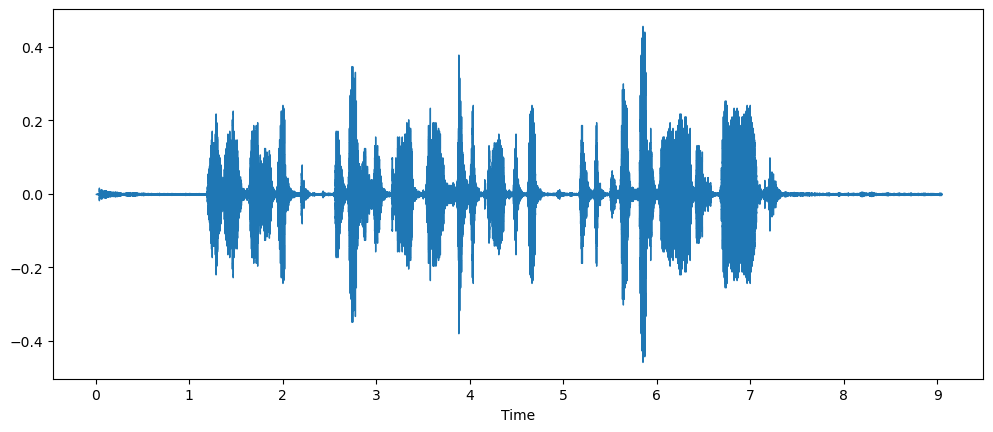

In [16]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)